In [4]:
import os
import numpy as np
import scipy as sp
import matplotlib.pyplot as plt
import lxml
import pandas as pd
from lxml import objectify, etree, html
import json
from pandas import read_csv
from pymystem3 import Mystem
from itertools import combinations
from collections import Counter
from sklearn.feature_extraction.text import CountVectorizer, TfidfTransformer

In [2]:
categories = ["culture", "health", "style", "education"]
categoryId = {"culture" : 0, "health" : 1, "style" : 2, "education" : 3}

In [11]:
xmlFile = open('texts.xml', encoding='utf-8').read()
utf8_parser = etree.XMLParser(encoding='utf-8')
root = etree.fromstring(xmlFile.encode('utf-8'), parser=utf8_parser)

In [41]:
allTexts = ({})
flag=0
for category in root:       
    texts = []
    for text in category:
        sentances = []
        for sent in text:
            sentances.append(sent.text)
            t = ' '.join(str(sentances))
            if "\ r" in t or "N o n e" in t:
                flag=1
            if flag==0:
                texts.append((text.attrib['title'], t))
        flag=0
        allTexts[category.attrib["name"]] = texts

In [27]:
f = open('Словарь н.txt', 'r')
text=f.read().split("\n")
words=[]
for item in text:
    words.append(item)

In [30]:
dictWordToIndex = {w: (list(words).index(w)) for w in words}
dictWordToIndex

{'минздрав': 0,
 'в': 1,
 'страна': 2,
 'открываться': 3,
 'по': 4,
 'несколько': 5,
 'сотня': 6,
 'фельдшерскоакушерский': 7,
 'пункт': 8,
 'год': 9,
 'как': 10,
 'сообщать': 11,
 'нга': 12,
 'прессслужба': 13,
 'после': 14,
 'проводить': 15,
 'совместно': 16,
 'с': 17,
 'субъект': 18,
 'рф': 19,
 'анализ': 20,
 'министерство': 21,
 'быть': 22,
 'разрабатывать': 23,
 'и': 24,
 'утверждать': 25,
 'комплекс': 26,
 'мера': 27,
 'развитие': 28,
 'первичный': 29,
 'медикосанитарный': 30,
 'помощь': 31,
 'впервые': 32,
 'советский': 33,
 'время': 34,
 'требование': 35,
 'к': 36,
 'размещение': 37,
 'медицинский': 38,
 'организация': 39,
 'исходить': 40,
 'из': 41,
 'численность': 42,
 'население': 43,
 'населенный': 44,
 'его': 45,
 'удаленность': 46,
 'от': 47,
 'близкий': 48,
 'это': 49,
 'давать': 50,
 'свой': 51,
 'результат': 52,
 'сказать': 53,
 'так': 54,
 'данные': 55,
 'ведомство': 56,
 'м': 57,
 'построить': 58,
 'вводить': 59,
 'эксплуатация': 60,
 'объект': 61,
 'они': 62,
 'фап

In [42]:
texts = pd.DataFrame(columns=["CategoryName", "TextId", "Title", "Text"])
for category in allTexts.keys():
    i = 0
    for pair in allTexts[category]:
        texts = texts.append({"CategoryName" : category, "TextId" : i, "Title" : pair[0], "Text" : pair[1]}, ignore_index=True)
        i += 1
texts

CategoryName  TextId                                              Title  \
0      education     0.0                  Бабушкины университеты в XXI веке   
1      education     1.0          Почему трехлеток должен обучать профессор   
2      education     2.0             Секрет долголетия – высшее образование   
3      education     3.0                         Министерство против науки?   
4      education     4.0       Прививку от коррупции будут делать за партой   
5      education     5.0       Как бизнесмены учат своих детей зарабатывать   
6      education     6.0                  Директору школы предложили свинью   
7      education     7.0  Историки предлагают чаще обновлять перечень уч...   
8      education     8.0      Гендерный дисбаланс в образовании сохраняется   
9      education     9.0  Эпидемия поножовщины в школах распространяется...   
10     education    10.0        Школы выйдут из муниципального подчинения     
11     education    11.0         Рынок платных образовательных услуг растет   
12     education    12.0                   Взросление ребенка откладывается   
13     education    13.0       Экспертизу книг для школы ждет коррекция (5)   
14     education    14.0  Подтверждена ученая степень Владимира Мединско...   
15     education    15.0        Предложено ввести тестирование учителей (4)   
16     education    16.0  Российский школьник выступил в Бундестаге  с п...   
17     education    17.0  Европейский университет в Санкт-Петербурге лиш...   
18     education    18.0  "Умные" словари помогут изменить ситуацию с чт...   
19     education    19.0  Около трети педагогов готовы поменять место ра...   
20     education    20.0  Как распознать "латентных инженеров" еще в дет...   
21     education    21.0           Кибербезопасность выходит на первый план   
22     education    22.0    Учителей, возможно, обяжут изучать дефектологию   
23     education    23.0                Что влияет на мобильность студентов   
24     education    24.0              В школьной программе грядут изменения   
25     education    25.0  Депутаты задумались о будущем системы образования   
26     education    26.0          Великовозрастные студенты – это нормально   
27     education    27.0  Профессии сферы услуг станут вскоре совсем дру...   
28     education    28.0             Дает ли школа шанс вырасти новой элите   
29     education    29.0  Эксперименты над детьми в прошлом не были цело...   
..           ...     ...                                                ...   
248      culture    87.0                         Слушайте музыку революции!   
249      culture    88.0                 Революция – под носом и на подносе   
250      culture    89.0  Гидон Кремер и Владимир Юровский – о 1917-м и ...   
251      culture    90.0                      Театр возвращается в квартиру   
252      culture    91.0       Необычные погодные явления и Красная Шапочка   
253      culture    92.0         Короткая жизнь Лермонтовой, ученицы Бакста   
254      culture    93.0            Танец жизни на музыку Симфонии-реквиема   
255      culture    94.0                                Поручено живописать   
256      culture    95.0  В Москве завершилась Биеннале театрального иск...   
257      culture    96.0              "Последнее пришествие" хантов и манси   
258      culture    97.0        Театральные деятели не хотят "жить в бреду"   
259      culture    98.0  Александр Сладковский: "Стационарный оркестр д...   
260      culture    99.0               Ярмарка тщеславия – зеркало тщедушия   
261      culture   100.0  Воронежский академический симфонический оркест...   
262      culture   101.0  V международный фестиваль современной хореогра...   
263      culture   102.0         Короткая жизнь Лермонтовой, ученицы Бакста   
264      culture   103.0                      Анатолий Васильев поторопился   
265      culture   104.0  Константин Ремчуков: Ельцин-Центр произвел пре...   
266      culture   105.0                              

In [127]:
X = texts.Text

In [128]:
Y = [categoryId[x] for x in texts.CategoryName]

In [129]:
vector = CountVectorizer()
tfidf = TfidfTransformer()

x = vector.fit_transform(X)
x = tfidf.fit_transform(x)
x.toarray().shape

(278, 1158)

In [131]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(x, Y, test_size = 0.3, random_state = 5)

In [132]:
print("Training sample:")
for category in categories:
    print("   " + category + " - " + str(len([x for x in y_train if x == categoryId[category]])))

Training sample:
   culture - 83
   health - 44
   style - 14
   education - 53


In [133]:
print("Test sample:")
for category in categories:
    print("   " + category + " - " + str(len([x for x in y_test if x == categoryId[category]])))

Test sample:
   culture - 34
   health - 17
   style - 9
   education - 24


In [134]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, VotingClassifier
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, recall_score, precision_score, f1_score, roc_curve, roc_auc_score
import itertools
from sklearn.svm import LinearSVC
from sklearn.feature_selection import SelectFromModel
from sklearn.multiclass import OneVsRestClassifier, OneVsOneClassifier

%matplotlib inline

In [139]:
# LogisticRegression
modelLR = LogisticRegression().fit(X_train, y_train)
y_test_predict = modelLR.predict(X_test)
reportLR = classification_report(y_test, y_test_predict, target_names=categories)
print(reportLR)

             precision    recall  f1-score   support

    culture       0.41      1.00      0.59        34
     health       0.00      0.00      0.00        17
      style       0.00      0.00      0.00         9
  education       0.50      0.04      0.08        24

avg / total       0.31      0.42      0.26        84



C:\Users\dns\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1113: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


In [140]:
matrix = confusion_matrix(y_test, y_test_predict)
matrix

array([[34,  0,  0,  0],
       [16,  0,  0,  1],
       [ 9,  0,  0,  0],
       [23,  0,  0,  1]])

C:\Users\dns\Anaconda3\lib\site-packages\sklearn\utils\validation.py:429: DataConversionWarning: Data with input dtype int32 was converted to float64 by the normalize function.
  warnings.warn(msg, _DataConversionWarning)


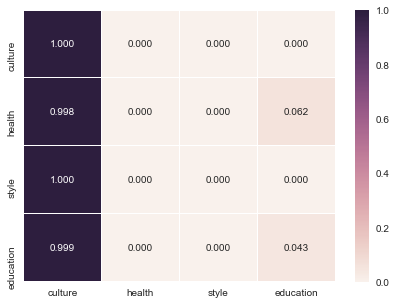

In [141]:
matrix = normalize(matrix)
plt.figure(figsize = (7,5))
sb.heatmap(matrix, annot=True, fmt=".3f", linewidths=.1, xticklabels=categories, yticklabels=categories)
plt.figure(figsize = (11,11))

In [142]:
# Linear Support Vector Classification
modelSVM = LinearSVC().fit(X_train, y_train)

In [143]:
y_test_predict = modelSVM.predict(X_test)
reportSVM = classification_report(y_test, y_test_predict, target_names=categories)
print(reportSVM)

             precision    recall  f1-score   support

    culture       0.48      0.85      0.62        34
     health       0.33      0.24      0.28        17
      style       0.00      0.00      0.00         9
  education       0.67      0.33      0.44        24

avg / total       0.45      0.49      0.43        84



C:\Users\dns\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1113: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


In [144]:
matrix = confusion_matrix(y_test, y_test_predict)
matrix

array([[29,  4,  0,  1],
       [11,  4,  0,  2],
       [ 8,  0,  0,  1],
       [12,  4,  0,  8]])

C:\Users\dns\Anaconda3\lib\site-packages\sklearn\utils\validation.py:429: DataConversionWarning: Data with input dtype int32 was converted to float64 by the normalize function.
  warnings.warn(msg, _DataConversionWarning)


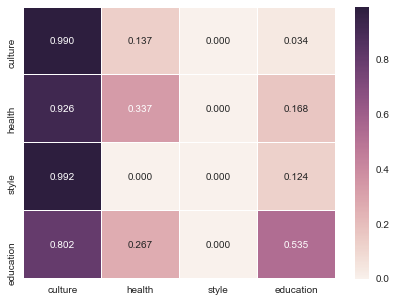

In [145]:
matrix = normalize(matrix)
plt.figure(figsize = (7,5))
sb.heatmap(matrix, annot=True, fmt=".3f", linewidths=.1, xticklabels=categories, yticklabels=categories)
plt.figure(figsize = (11,11))

In [146]:
# Gradient Boosting Classifier
modelGBC = GradientBoostingClassifier(n_estimators=100).fit(X_train, y_train)

In [148]:
y_test_predict = modelGBC.predict(X_test.toarray())
report = classification_report(y_test, y_test_predict, target_names=categories)
print(report)

             precision    recall  f1-score   support

    culture       0.48      0.85      0.62        34
     health       0.36      0.29      0.32        17
      style       0.00      0.00      0.00         9
  education       0.60      0.25      0.35        24

avg / total       0.44      0.48      0.42        84



C:\Users\dns\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1113: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


In [149]:
matrix = confusion_matrix(y_test, y_test_predict)
matrix

array([[29,  4,  0,  1],
       [10,  5,  0,  2],
       [ 7,  1,  0,  1],
       [14,  4,  0,  6]])

C:\Users\dns\Anaconda3\lib\site-packages\sklearn\utils\validation.py:429: DataConversionWarning: Data with input dtype int32 was converted to float64 by the normalize function.
  warnings.warn(msg, _DataConversionWarning)


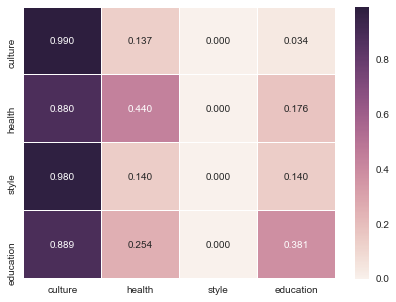

In [150]:
matrix = normalize(matrix)
plt.figure(figsize = (7,5))
sb.heatmap(matrix, annot=True, fmt=".3f", linewidths=.1, xticklabels=categories, yticklabels=categories)
plt.figure(figsize = (11,11))

(0, 0.001)

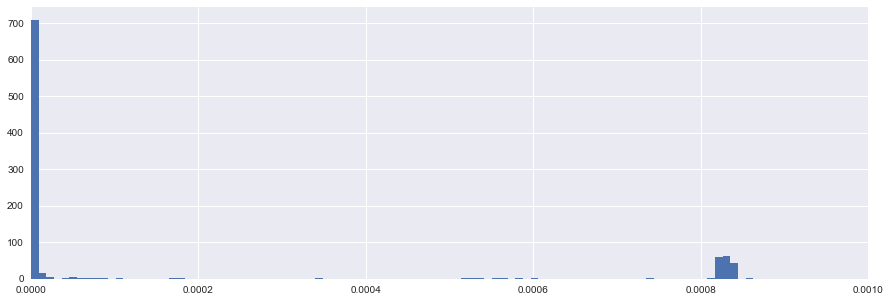

In [151]:
plt.figure(figsize=(15, 5))

plt.hist(modelGBC.feature_importances_, bins=2000)
plt.grid(True)
plt.xlim(0, 0.001)

In [154]:
# Random Forest Classifier
modelRF = RandomForestClassifier(n_estimators=1000).fit(X_train, y_train)

In [155]:
y_test_predict = modelRF.predict(X_test)
report = classification_report(y_test, y_test_predict, target_names=categories)
print(report)

             precision    recall  f1-score   support

    culture       0.41      0.97      0.57        34
     health       0.00      0.00      0.00        17
      style       0.00      0.00      0.00         9
  education       0.50      0.04      0.08        24

avg / total       0.31      0.40      0.25        84



C:\Users\dns\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1113: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


In [156]:
matrix = confusion_matrix(y_test, y_test_predict)
matrix

array([[33,  1,  0,  0],
       [16,  0,  0,  1],
       [ 9,  0,  0,  0],
       [23,  0,  0,  1]])

C:\Users\dns\Anaconda3\lib\site-packages\sklearn\utils\validation.py:429: DataConversionWarning: Data with input dtype int32 was converted to float64 by the normalize function.
  warnings.warn(msg, _DataConversionWarning)


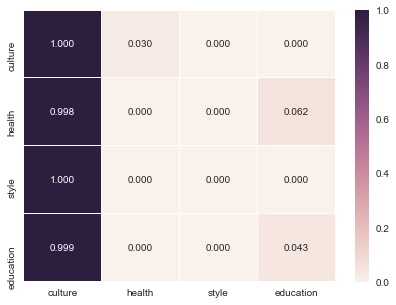

In [157]:
matrix = normalize(matrix)
plt.figure(figsize = (7,5))
sb.heatmap(matrix, annot=True, fmt=".3f", linewidths=.1, xticklabels=categories, yticklabels=categories)
plt.figure(figsize = (11,11))

(0, 0.001)

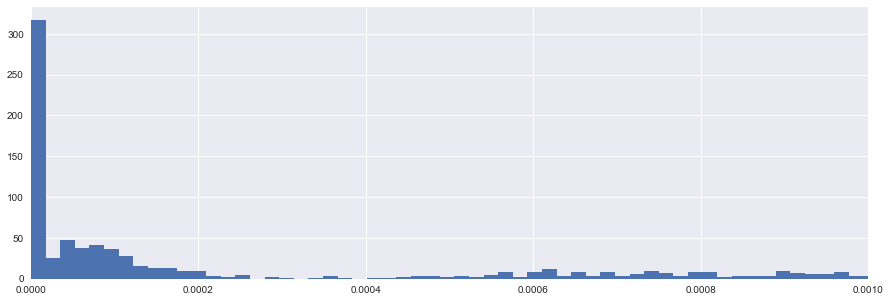

In [158]:
plt.figure(figsize=(15, 5))

plt.hist(modelRF.feature_importances_, bins=1000)
plt.grid(True)
plt.xlim(0, 0.001)

In [183]:
ens = VotingClassifier([('LR', LogisticRegression()),
                        ('rf_gini_100', RandomForestClassifier(n_estimators=100)),
                        ('rf_entropy_1000', RandomForestClassifier(n_estimators=1000, criterion='entropy')),
                        ('gbt_100', GradientBoostingClassifier(n_estimators=100))], voting='soft', n_jobs=1)
ens.fit(X_train, y_train)
y_test_predict = ens.predict(X_test.toarray())

In [184]:
report = classification_report(y_test, y_test_predict, target_names=categories)
print(report)

             precision    recall  f1-score   support

    culture       0.42      0.97      0.58        34
     health       0.50      0.06      0.11        17
      style       0.00      0.00      0.00         9
  education       0.67      0.08      0.15        24

avg / total       0.46      0.43      0.30        84



C:\Users\dns\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1113: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


In [185]:
matrix = confusion_matrix(y_test, y_test_predict)
matrix

array([[33,  1,  0,  0],
       [15,  1,  0,  1],
       [ 9,  0,  0,  0],
       [22,  0,  0,  2]])

C:\Users\dns\Anaconda3\lib\site-packages\sklearn\utils\validation.py:429: DataConversionWarning: Data with input dtype int32 was converted to float64 by the normalize function.
  warnings.warn(msg, _DataConversionWarning)


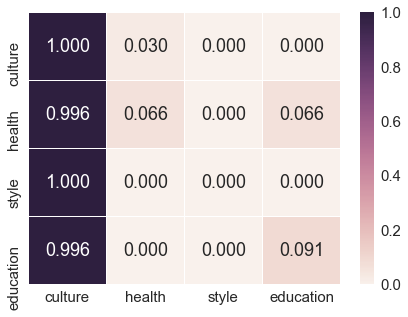

In [186]:
matrix = normalize(matrix)
plt.figure(figsize = (7,5))
sb.heatmap(matrix, annot=True, fmt=".3f", linewidths=.1, xticklabels=categories, yticklabels=categories)
plt.figure(figsize = (11,11))

In [187]:
# Binary classification
from sklearn.multiclass import OneVsRestClassifier, OneVsOneClassifier

In [188]:
oneTOall = OneVsRestClassifier(LinearSVC(), n_jobs=8).fit(X_train, y_train)
y_test_predict = oneTOall.predict(X_test)
report = classification_report(y_test, y_test_predict, target_names=categories)
print(report)

             precision    recall  f1-score   support

    culture       0.48      0.85      0.62        34
     health       0.33      0.24      0.28        17
      style       0.00      0.00      0.00         9
  education       0.67      0.33      0.44        24

avg / total       0.45      0.49      0.43        84



C:\Users\dns\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1113: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


In [189]:
matrix = confusion_matrix(y_test, y_test_predict)
matrix

array([[29,  4,  0,  1],
       [11,  4,  0,  2],
       [ 8,  0,  0,  1],
       [12,  4,  0,  8]])

C:\Users\dns\Anaconda3\lib\site-packages\sklearn\utils\validation.py:429: DataConversionWarning: Data with input dtype int32 was converted to float64 by the normalize function.
  warnings.warn(msg, _DataConversionWarning)


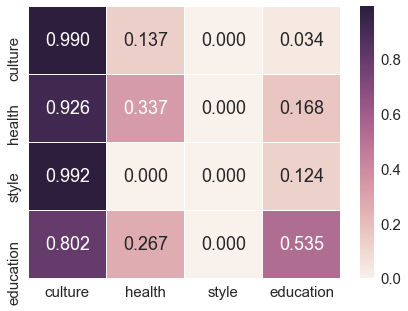

In [190]:
matrix = normalize(matrix)
plt.figure(figsize = (7,5))
sb.heatmap(matrix, annot=True, fmt=".3f", linewidths=.1, xticklabels=categories, yticklabels=categories)
plt.figure(figsize = (11,11))

In [191]:
oneTOone = OneVsOneClassifier(LinearSVC(), n_jobs=8).fit(X_train, y_train)
y_test_predict = oneTOone.predict(X_test)
report = classification_report(y_test, y_test_predict, target_names=categories)
print(report)

             precision    recall  f1-score   support

    culture       0.45      0.91      0.60        34
     health       0.20      0.06      0.09        17
      style       0.00      0.00      0.00         9
  education       0.60      0.25      0.35        24

avg / total       0.39      0.45      0.36        84



C:\Users\dns\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1113: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


In [192]:
matrix = confusion_matrix(y_test, y_test_predict)
matrix

array([[31,  2,  0,  1],
       [14,  1,  0,  2],
       [ 8,  0,  0,  1],
       [16,  2,  0,  6]])

C:\Users\dns\Anaconda3\lib\site-packages\sklearn\utils\validation.py:429: DataConversionWarning: Data with input dtype int32 was converted to float64 by the normalize function.
  warnings.warn(msg, _DataConversionWarning)


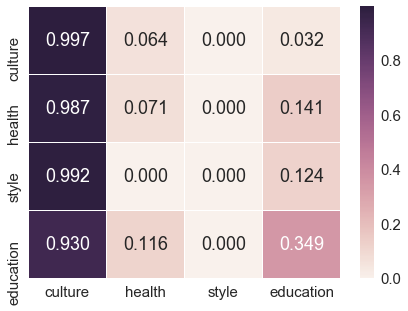

In [193]:
matrix = normalize(matrix)
plt.figure(figsize = (7,5))
sb.heatmap(matrix, annot=True, fmt=".3f", linewidths=.1, xticklabels=categories, yticklabels=categories)
plt.figure(figsize = (11,11))